# Getting started
## Demo - Dissimilarity Based Selection Synthetic Data

In this tutorial, we are going to show how the `DiverseSelector` work with 2D synthetic data. Each
axis represents one feature. For each example, we will have two different synthetic datasets where
the first one can be seen as randomly generated data points and the latter generates data points
belonging to different clusters. By using 2D feature data points, it makes visualization easy.

## Generating Synthetic Data

Two data sets of 100 points are generated.
* The first data set consists  of 100 points  uniformly  distributed in one cluster.
* The second data set consists of 100 points uniformly distributed in three well defined clusters.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
from DiverseSelector import MaxMin, MaxSum, OptiSim, DirectedSphereExclusion, GridPartitioning


In [2]:
# generating the first dataset and the pairwise distances between the points
# ---------------------------------------------------------------------------
# Generate synthetic data using make_blobs 100 samples, 2 features, 1 cluster
coords, class_labels = make_blobs(n_samples=100, n_features=2, centers=1, random_state=42)
# Calculate the pairwise distances between the points using the euclidean metric
arr_dist = pairwise_distances(coords, metric="euclidean")

# generating the second dataset and the pairwise distances between the points
# ---------------------------------------------------------------------------
# Generate synthetic data using make_blobs 100 samples, 2 features, 3 clusters
# `class_labels_cluster` is the cluster label for each point.
coords_cluster, class_labels_cluster = make_blobs(
    n_samples=100, n_features=2, centers=3, random_state=42
)
# Calculate the pairwise distances between the points using the euclidean metric
arr_dist_cluster = pairwise_distances(coords_cluster, metric="euclidean")


# Define a utility function to plot the data and the selected points
# ---------------------------------------------------------------------------
def graph_data(coords, selected=None, reference=False, title="", x_label="", y_label=""):
    """Graphs the data in a scatter plot."""
    plt.figure(dpi=150)
    plt.scatter(coords[:, 0], coords[:, 1])

    # Add a title
    plt.title(title)

    # Add x and y labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    if selected:
        for i, mol_id in enumerate(selected):
            plt.scatter(coords[mol_id, 0], coords[mol_id, 1], c="r")
            plt.text(coords[mol_id, 0], coords[mol_id, 1], str(i + 1))
    if reference:
        plt.scatter(coords[0, 0], coords[0, 1], c="black")
    plt.show()

The generated data can be visualized as follows:

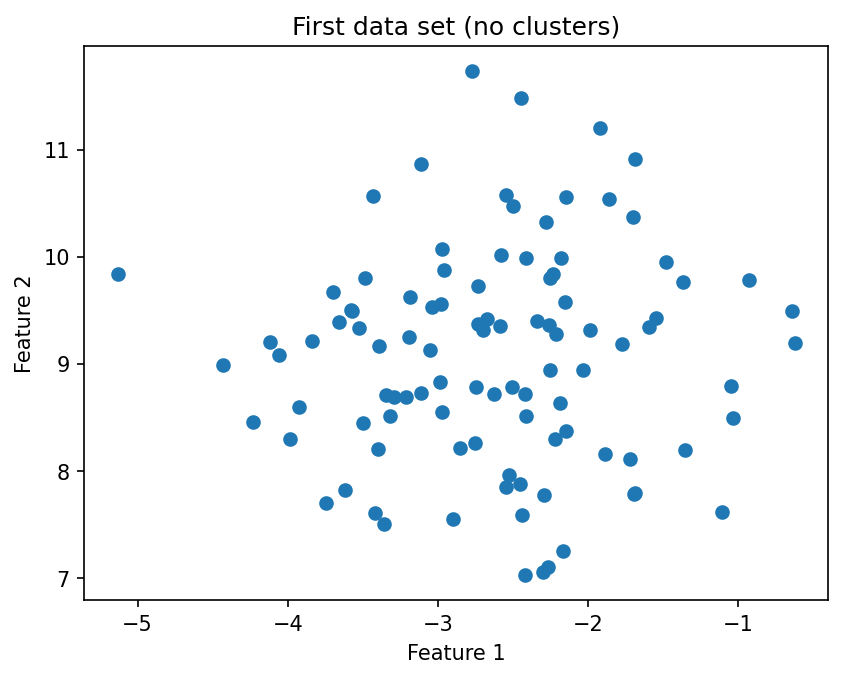

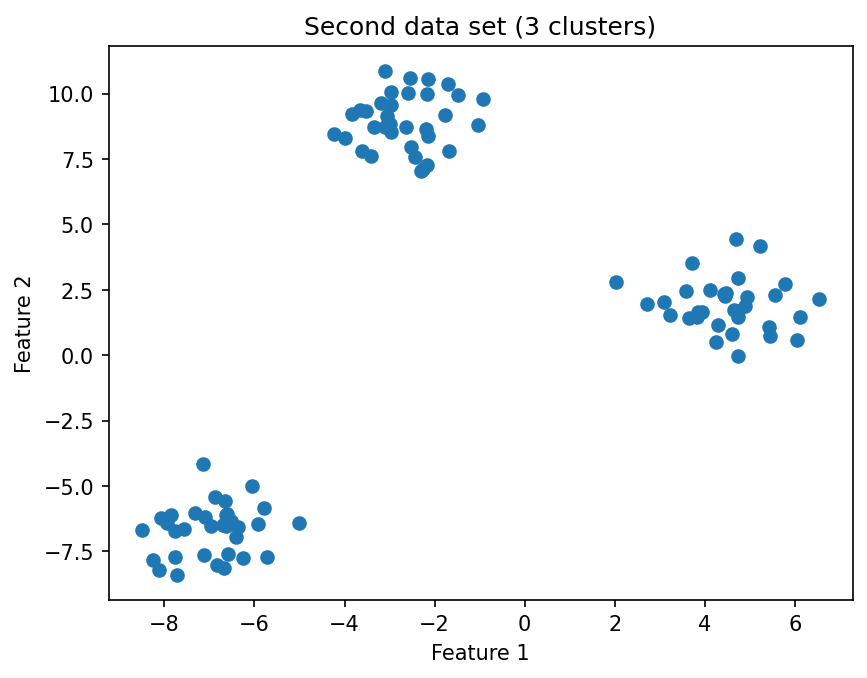

In [3]:
graph_data(
    coords,
    title="First data set (no clusters)",
    x_label="Feature 1",
    y_label="Feature 2",
)
graph_data(
    coords_cluster,
    title="Second data set (3 clusters)",
    x_label="Feature 1",
    y_label="Feature 2",
)

In this tutorial, we are going to show how the `DiverseSelector` work with 2D synthetic data. Each
axis represents one feature. For each example, we will have two different synthetic datasets where
the first one can be seen as randomly generated data points and the latter generates data points
belonging to different clusters. By using 2D feature data points, it makes visualization easy.

## Running QC-Selector

In the following sections we will show how to use the different sampling algorithms implemented in
QC-Selector to select a subset of cells from a dataset. We will use the synthetic dataset generated
in the previous section. Each algorithm will be used to select a subset of 12 samples from the first
and second datasets.

### Brute Strength - MaxMin

The `maxmin` algorithm is a brute strength approach that selects a subset of the data which
maximizes the minimum distance between any two points in the subset. 

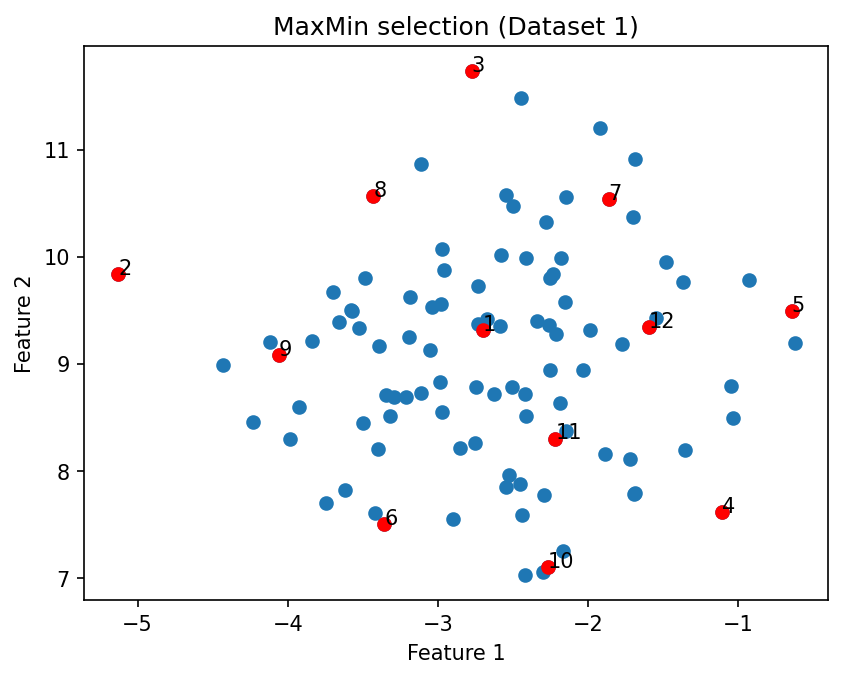

In [4]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = MaxMin()
# The distance matrix `arr_dist` is needed for the selection.
selected_ids1 = selector.select(arr=arr_dist, size=12)

graph_data(
    coords,
    selected_ids1,
    title="MaxMin selection (Dataset 1)",
    x_label="Feature 1",
    y_label="Feature 2",
)

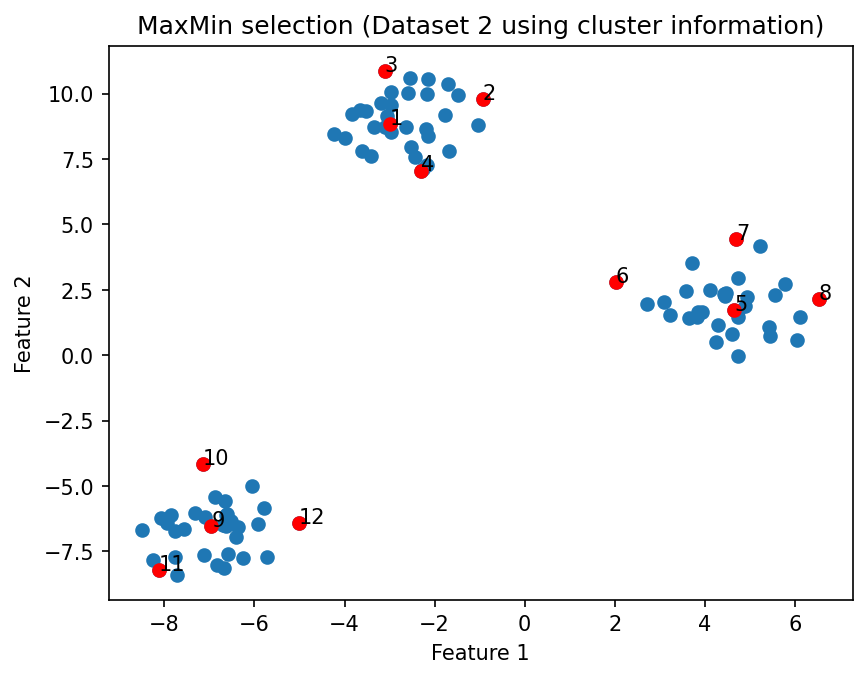

In [5]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = MaxMin()
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(arr=arr_dist_cluster, size=12, labels=class_labels_cluster)

graph_data(
    coords_cluster,
    selected_ids2,
    title="MaxMin selection (Dataset 2 using cluster information)",
    x_label="Feature 1",
    y_label="Feature 2",
)

### Brute Strength - MaxSum

The `maxsum` algorithm is a brute strength approach that selects a subset of the data which
maximizes the sum of the pairwise distances between the selected points. 

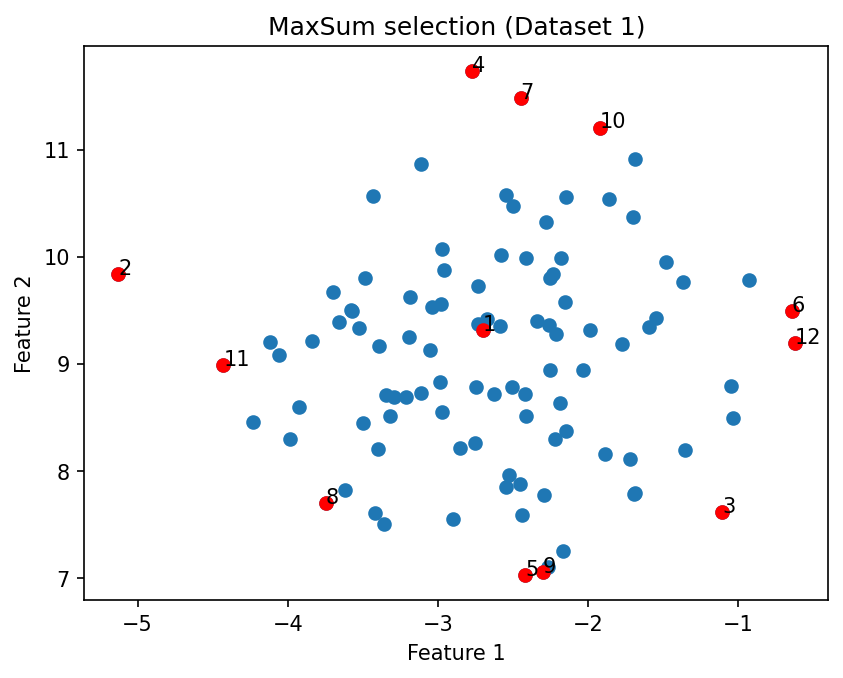

In [6]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = MaxSum()
# The distance matrix `arr_dist` is needed for the selection.
selected_ids1 = selector.select(arr=arr_dist, size=12)

graph_data(
    coords,
    selected_ids1,
    title="MaxSum selection (Dataset 1)",
    x_label="Feature 1",
    y_label="Feature 2",
)

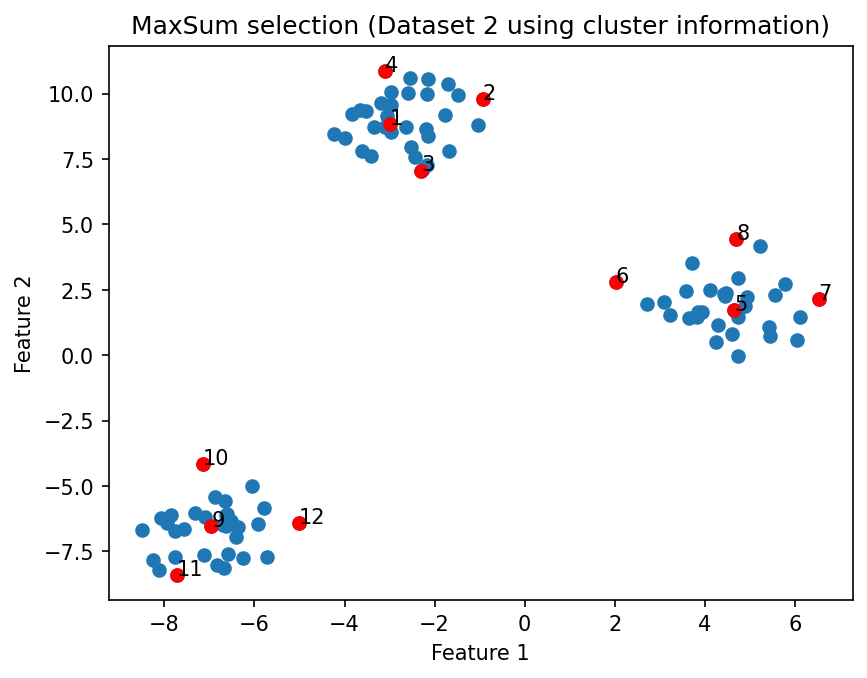

In [7]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = MaxSum()
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(arr=arr_dist_cluster, size=12, labels=class_labels_cluster)

graph_data(
    coords_cluster,
    selected_ids2,
    title="MaxSum selection (Dataset 2 using cluster information)",
    x_label="Feature 1",
    y_label="Feature 2",
)

The MaxSum algorithm maximizes the sum of the pair-wise distances of the selected points. The MaxSum
algorithm will start selecting outliers. This can be explained as follows:
  1. If the starting point is the medoid of the data, then the point that is the furthest away from the
medoid will be selected (an outlier).
  2. The next point that will be selected that has the biggest sum
of distances to the first (medoid) and second (outlier) points. This point will be an outlier in the
opposite direction of the first outlier. 
  3. The algoritm will continue in this way, selecting the
points that have the biggest sum of distances to the already selected points. This will result in
the selection of outliers first.



### Adapted Optimizable K-Dissimilarity Selection (OptiSim)

The OptiSim algorithm selects a subset of the data points with maximum diversity. The diversity of
the subset is measured by the k-dissimilarity, which is the average dissimilarity between its 
points.

The results of this algorithm depend heavily on the `tol` tolerance parameter. Here a value of 0.1
is used for the synthetic data, because if the default value of 5 is used, the algorithm will select
less points.

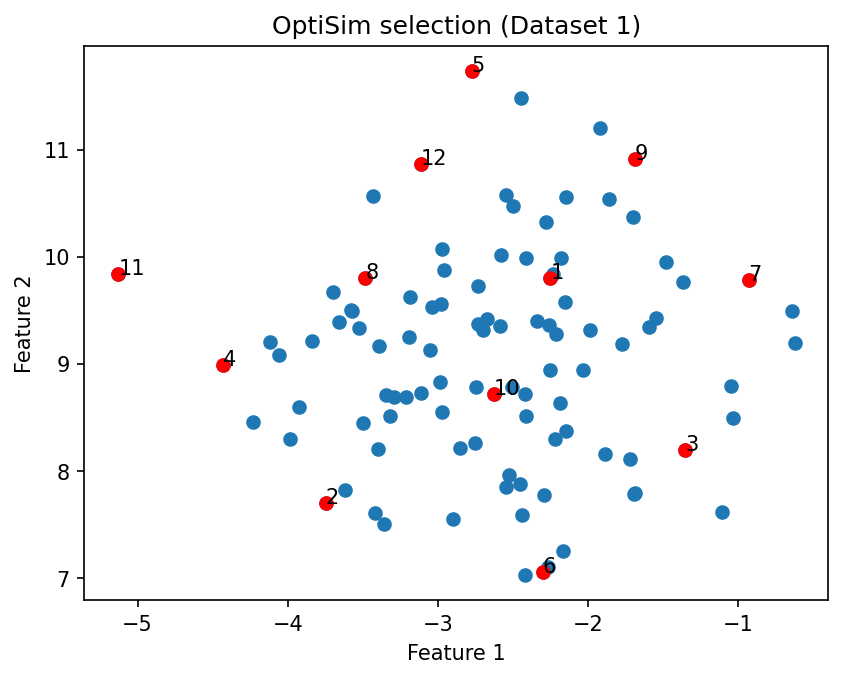

In [8]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = OptiSim(tol=0.1)
selected_ids1 = selector.select(coords, size=12)

graph_data(
    coords,
    selected_ids1,
    title="OptiSim selection (Dataset 1)",
    x_label="Feature 1",
    y_label="Feature 2",
)

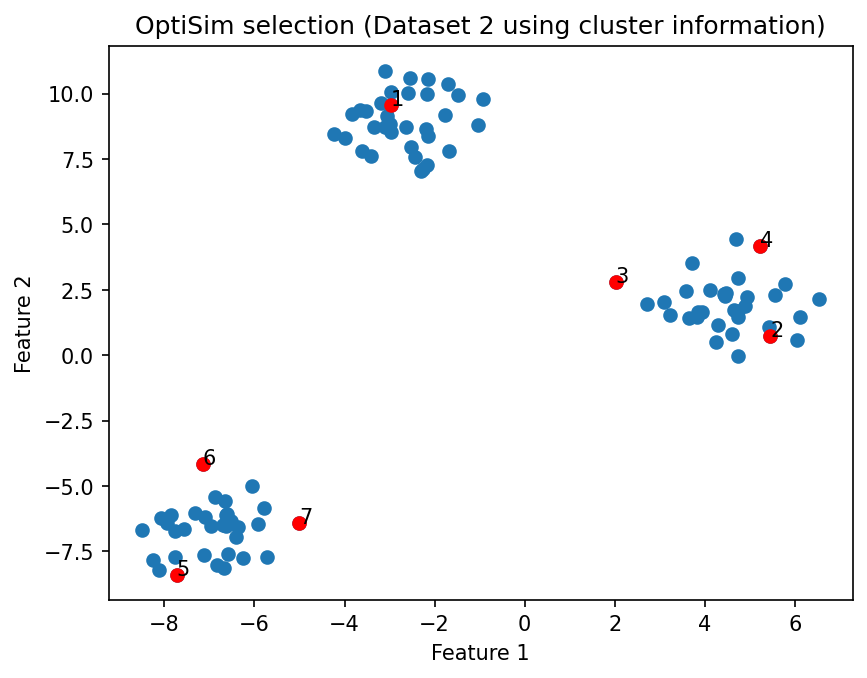

In [9]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = OptiSim()
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12, labels=class_labels_cluster)

graph_data(
    coords_cluster,
    selected_ids2,
    title="OptiSim selection (Dataset 2 using cluster information)",
    x_label="Feature 1",
    y_label="Feature 2",
)

### Directed Sphere Exclusion

The Directed Sphere iteratively excludes any sample within a given radius from any already selected
sample. The radius of the exclusion sphere adjusted such that the number of samples selected is
equal to the desired number of samples. The algorithm is described in [1].

\[1\] Gobbi, A., and Lee, M.-L. (2002). **DISE: Directed Sphere Exclusion**. *Journal of Chemical 
Information and Computer Sciences*, 43(1), 317–323. 
[DOI: 10.1021/ci025554v](https://doi.org/10.1021/ci025554v)

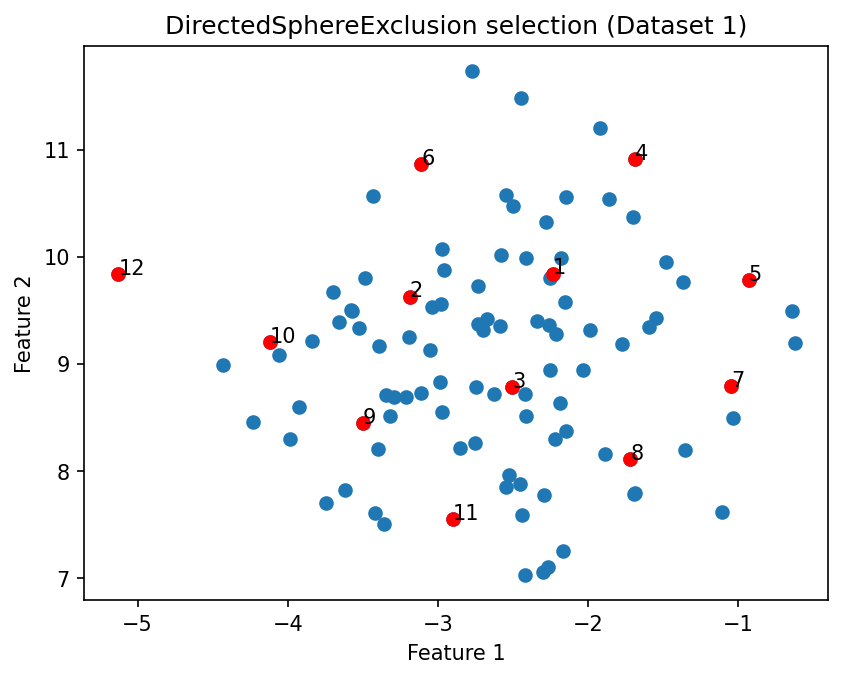

In [10]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = DirectedSphereExclusion()
selected_ids1 = selector.select(coords, size=12)

graph_data(
    coords,
    selected_ids1,
    title="DirectedSphereExclusion selection (Dataset 1)",
    x_label="Feature 1",
    y_label="Feature 2",
)

/mnt/Data/Marco/Trabajo/Ayers/QC-Devs/DiverseSelector/DiverseSelector/methods/utils.py:112: UserWarning: Optimal radius finder failed to converge, selected 5 points instead of requested 4.
  warnings.warn(


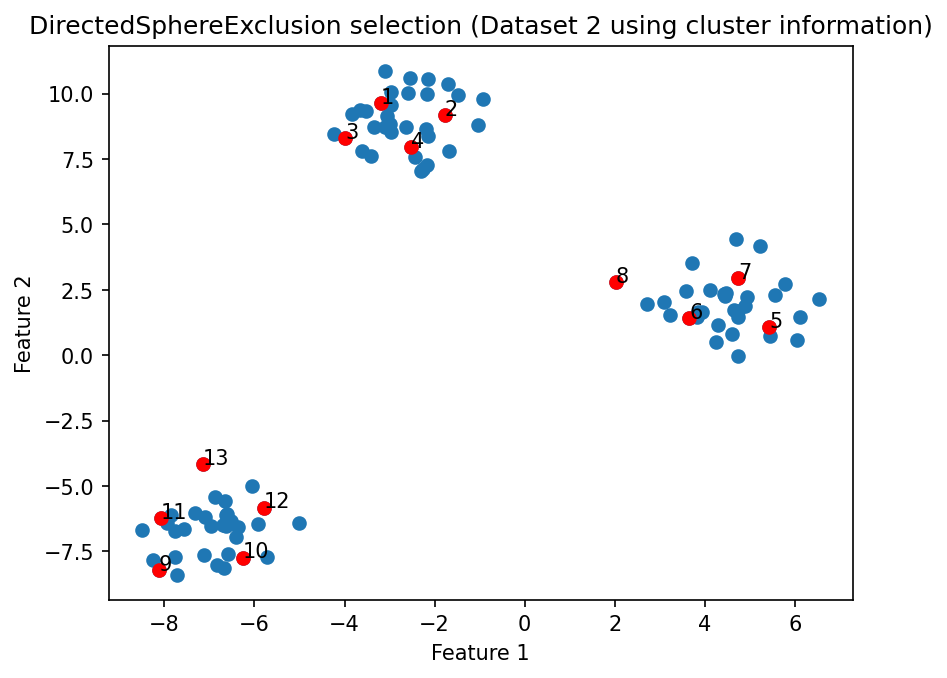

In [11]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = DirectedSphereExclusion()
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12, labels=class_labels_cluster)

graph_data(
    coords_cluster,
    selected_ids2,
    title="DirectedSphereExclusion selection (Dataset 2 using cluster information)",
    x_label="Feature 1",
    y_label="Feature 2",
)

This algorithm is not guaranteed to find a solution as sometimes fails to find an exclusion sphere 
radius that corresponds to the desired number of points. In this case it returns the closest 
solution found to the desired number of points. Because of this the number of points in the output
may be slightly different from the desired number of points.

In this case, it fails for one of the clusters, returning 5 points instead of 4. Because of this,
the total number of selected points is 13 instead of 12.

### Grid Partitioning Method

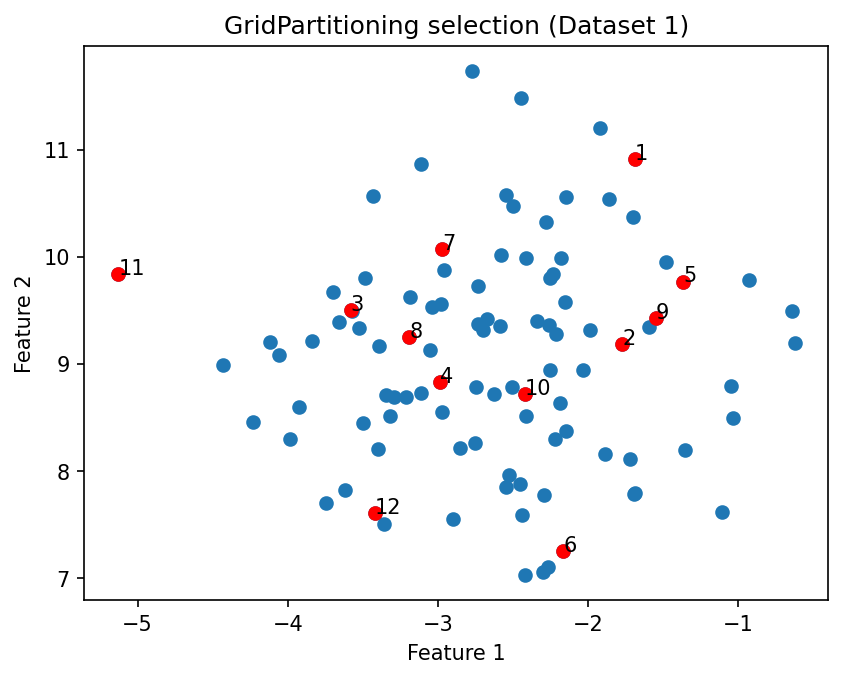

In [19]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = GridPartitioning(2,"equisized_independent")
selected_ids1 = selector.select(coords, size=12)

graph_data(
    coords,
    selected_ids1,
    title="GridPartitioning selection (Dataset 1)",
    x_label="Feature 1",
    y_label="Feature 2",
)

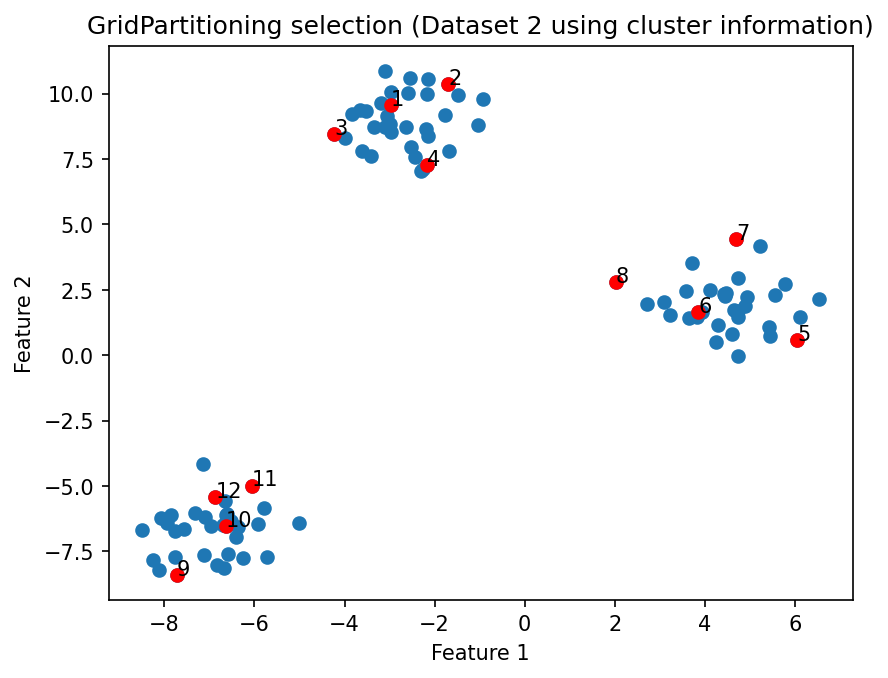

In [13]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = GridPartitioning(2,"equisized_independent")
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12, labels=class_labels_cluster)

graph_data(
    coords_cluster,
    selected_ids2,
    title="GridPartitioning selection (Dataset 2 using cluster information)",
    x_label="Feature 1",
    y_label="Feature 2",
)

### Notes on the selection using data arranged in clusters

When the selector class selects `N` points from a dataset with each point belonging to a cluster (by cluster labels), the selector will select `N//num_clusters` points from each cluster. This sometimes brings undesired results, as the clusters may have different sizes and `N` may not be even divisible by `num_clusters`. In this case, the selector will select `N//num_clusters` points from each cluster. For example, if `N=14` and the data is divided in three clusters, the selector will select `4` points from each cluster.

An approach to solve this can be to select the points from the data without using the cluster labels. This can also be useful when the data is arranged in clusters but the cluster labels are not available. Nonetheless care must be taken as not all algorithms provide *"diverse"* points.

## Selection from clusters but without the cluster information

Sometimes it is the case that the data is clustered but the cluster information is not available. In
this case, we can still use the `DiverseSelector` to select a representative (diverse) subset of the
data. For this the selection methods are used on the data without the cluster information. The
quality of the results will depend on the method used. In the following we will use the synthetic
data with 3 clusters to show how the different methods perform.


### MaxMin selection

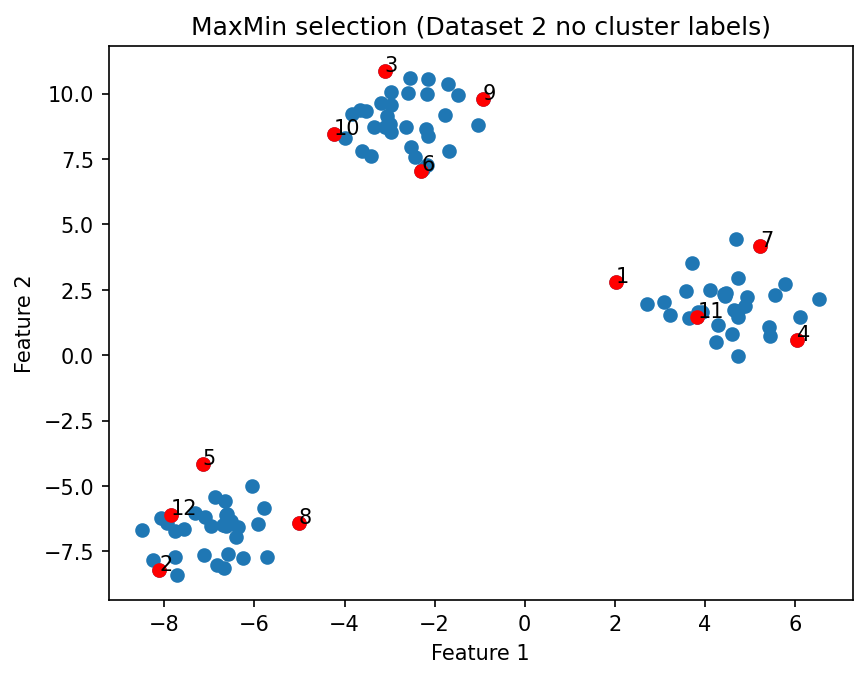

In [14]:
# Selecting 12 diverse data points from the first dataset (100 points  uniformly  distributed in one
# cluster). 
selector = MaxMin()
# The distance matrix `arr_dist_cluster` is needed for the selection.
selected_ids1 = selector.select(arr=arr_dist_cluster, size=12)

graph_data(
    coords_cluster,
    selected_ids1,
    title="MaxMin selection (Dataset 2 no cluster labels)",
    x_label="Feature 1",
    y_label="Feature 2",
)

The results of the `MaxMin` algorithm with clustered data are good even when no information 
regarding the cluster labels is provided.

### MaxSum selection

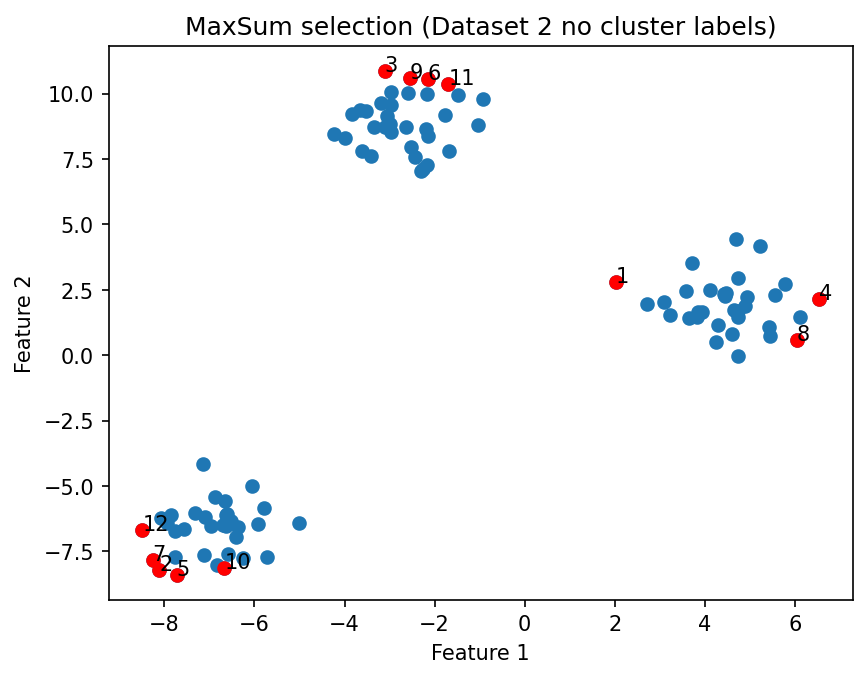

In [15]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = MaxSum()
# The algorithm will use the information of the clusters to select the points.
selected_ids1 = selector.select(arr=arr_dist_cluster, size=12)

graph_data(
    coords_cluster,
    selected_ids1,
    title="MaxSum selection (Dataset 2 no cluster labels)",
    x_label="Feature 1",
    y_label="Feature 2",
)

The results of the `MaxSum` algorithm with clustered data are NOT good when no information regarding
the cluster labels is provided. The set of points selected by the algorithm is not diverse enough. 
The points tend to be the ones farthest away from the medoid of the complete data, even when the 
points withing each cluster are very close to each other. This is to be expected of a collective
diversity measure, as the sum of the distances (of the selected points) to the medoid.

### Adapted Optimizable K-Dissimilarity Selection (OptiSim)

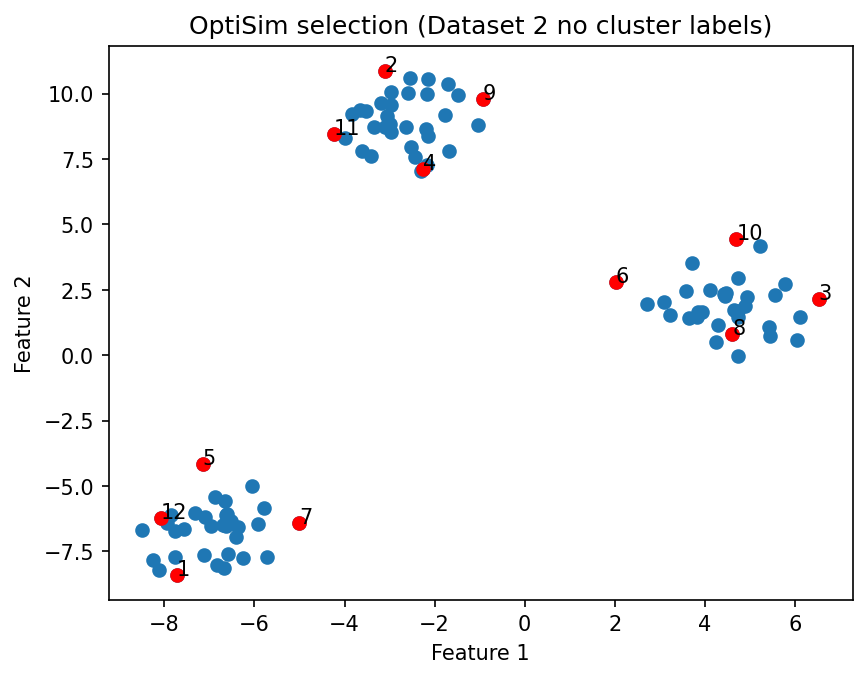

In [16]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = OptiSim(tol=0.1)
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12)

graph_data(
    coords_cluster,
    selected_ids2,
    title="OptiSim selection (Dataset 2 no cluster labels)",
    x_label="Feature 1",
    y_label="Feature 2",
)

The results of the `OptiSim` algorithm with clustered data are good even when no information 
regarding the cluster labels is provided.

### Directed Sphere Exclusion Selection

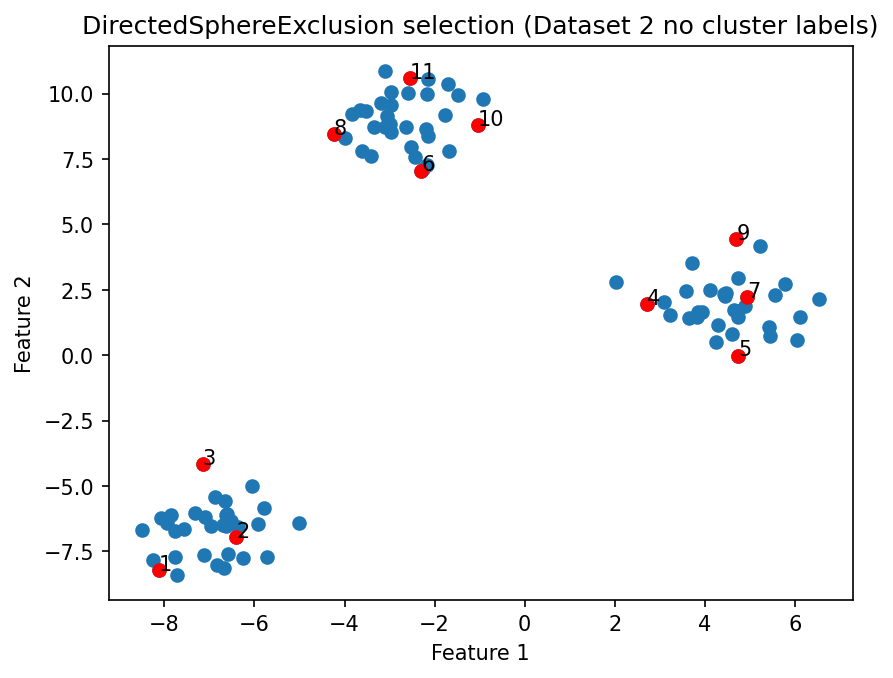

In [17]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = DirectedSphereExclusion()
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12)

graph_data(
    coords_cluster,
    selected_ids2,
    title="DirectedSphereExclusion selection (Dataset 2 no cluster labels)",
    x_label="Feature 1",
    y_label="Feature 2",
)

The results of the `DirectedSphereExclusion` algorithm with clustered data are good even when no 
information regarding the cluster labels is provided.

### Grid Partitioning Method

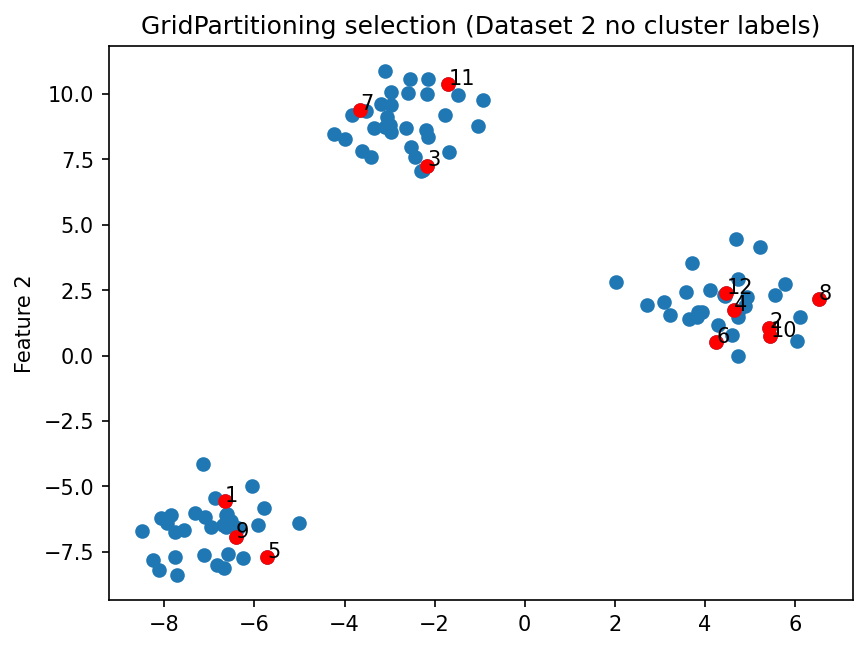

In [18]:
# Selecting 12 diverse data points from the second dataset (100 points distributed in three obvious
# clusters).
selector = GridPartitioning(2,"equisized_independent")
# The algorithm will use the information of the clusters to select the points.
selected_ids2 = selector.select(coords_cluster, size=12)

graph_data(
    coords_cluster,
    selected_ids2,
    title="GridPartitioning selection (Dataset 2 no cluster labels)",
    y_label="Feature 2",
)

The results of the Grid based methods with clustered data are questionable even when no information 
regarding the cluster labels is provided. The selected points withing each clusters are not diverse
enough.